In [25]:
import os
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [26]:
data = pl.read_csv('./dataset/7.email/email_table.csv')
email_open = pl.read_csv('./dataset/7.email/email_opened_table.csv') # open email
email_link = pl.read_csv('./dataset/7.email/link_clicked_table.csv') # open email and click link

In [27]:
email_open = set(email_open.to_numpy().flatten())
email_link = set(email_link.to_numpy().flatten())

In [28]:
inter = email_open.intersection(email_link)
len(email_open), len(email_link), len(inter)

(10345, 2119, 2069)

In [29]:
email_open = email_open | email_link

In [30]:
data.head()

email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
i64,str,str,i64,str,str,i64
85120,"""short_email""","""personalized""",2,"""Sunday""","""US""",5
966622,"""long_email""","""personalized""",12,"""Sunday""","""UK""",2
777221,"""long_email""","""personalized""",11,"""Wednesday""","""US""",2
493711,"""short_email""","""generic""",6,"""Monday""","""UK""",1
106887,"""long_email""","""generic""",14,"""Monday""","""US""",6


In [31]:
data = data.with_columns(
    pl.col('email_id').is_in(email_open).alias('open'),
    pl.col('email_id').is_in(email_link).alias('click'),
)

In [32]:
display(data['open'].value_counts(normalize=True))
display(data['click'].value_counts(normalize=True))

open,proportion
bool,f64
true,0.10395
false,0.89605


click,proportion
bool,f64
true,0.02119
false,0.97881


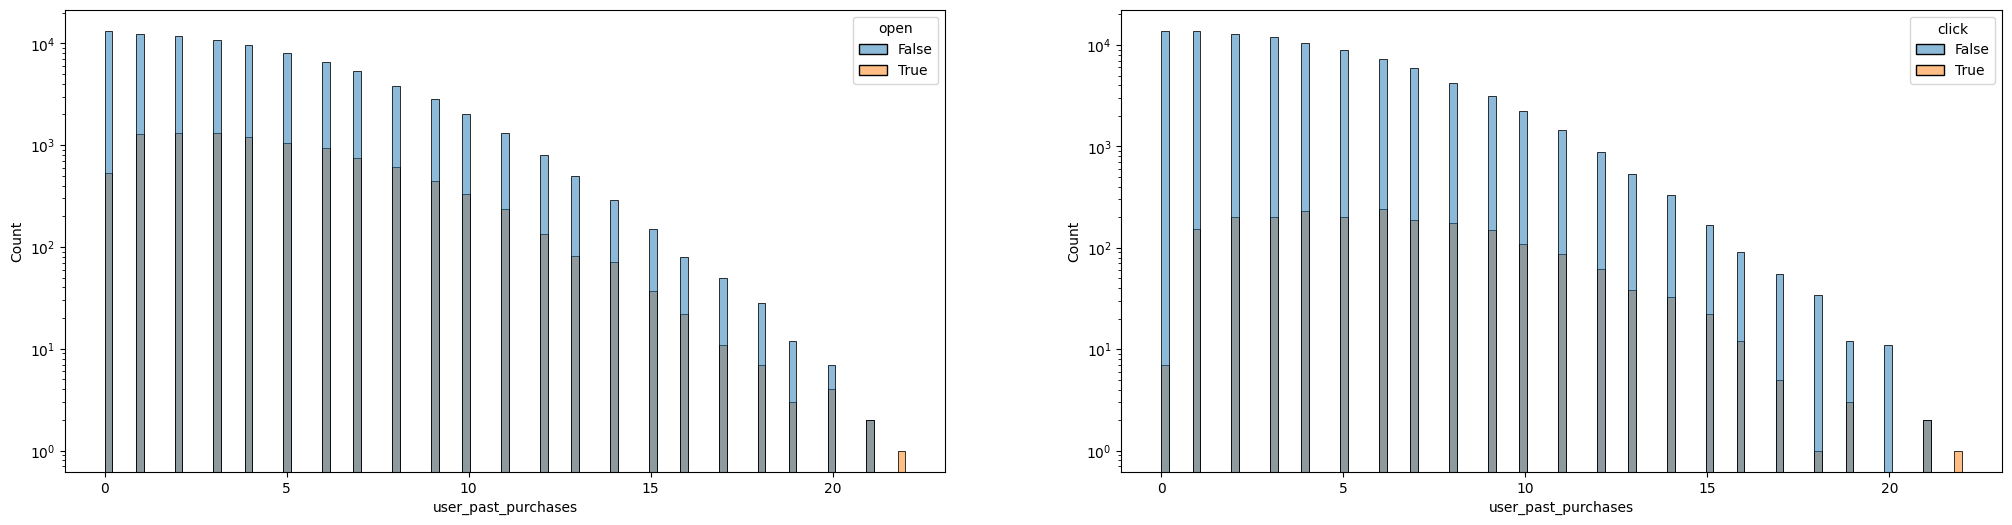

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.histplot(data=data, x='user_past_purchases', hue='open', ax=ax[0]);
sns.histplot(data=data, x='user_past_purchases', hue='click', ax=ax[1]);
ax[0].set_yscale('log')
ax[1].set_yscale('log')

In [34]:
data.head()

email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
i64,str,str,i64,str,str,i64,bool,bool
85120,"""short_email""","""personalized""",2,"""Sunday""","""US""",5,false,false
966622,"""long_email""","""personalized""",12,"""Sunday""","""UK""",2,true,true
777221,"""long_email""","""personalized""",11,"""Wednesday""","""US""",2,false,false
493711,"""short_email""","""generic""",6,"""Monday""","""UK""",1,false,false
106887,"""long_email""","""generic""",14,"""Monday""","""US""",6,false,false


In [48]:
data_purchase = data.group_by('user_past_purchases').agg(pl.mean(['open', 'click'])).sort('user_past_purchases')
data_hr = data.group_by('hour').agg(pl.mean(['open', 'click'])).sort('hour')


Text(0.5, 0, 'hour')

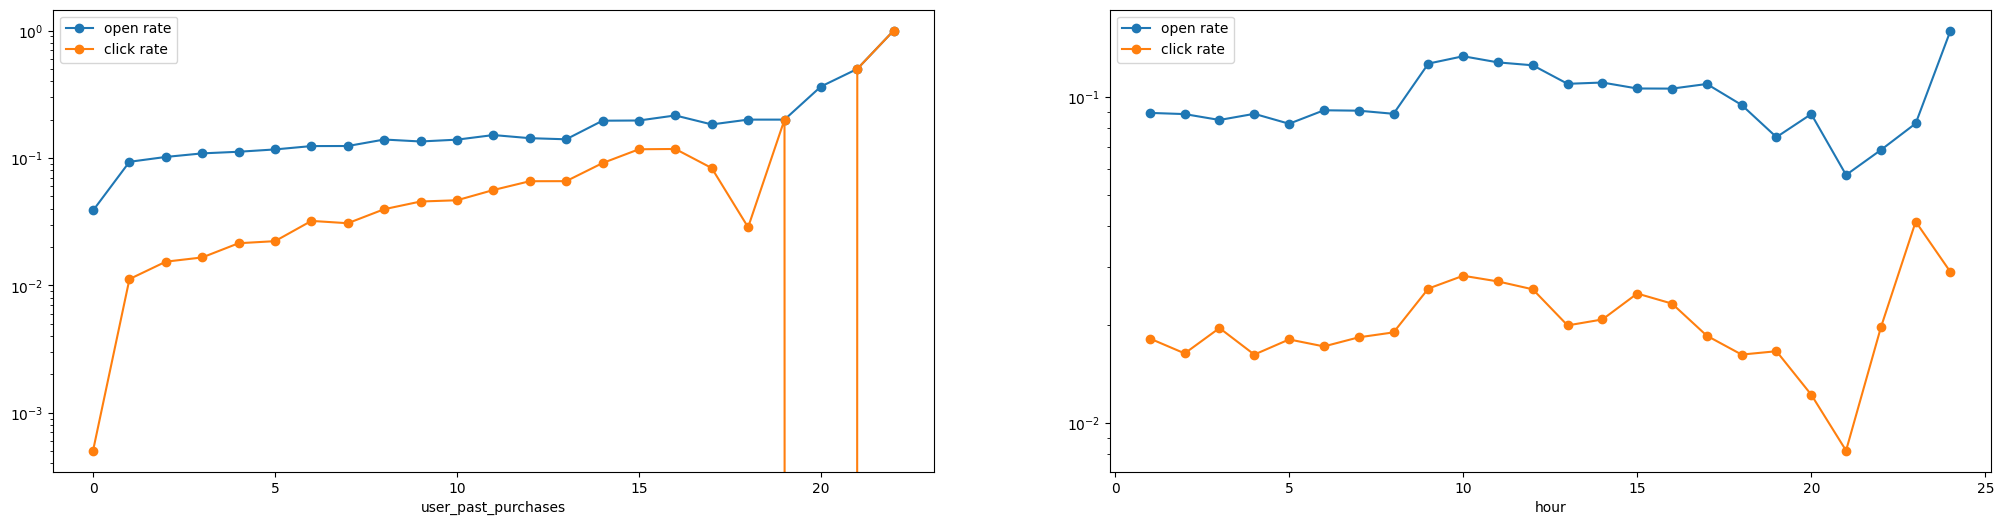

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
ax[0].plot(data_purchase['user_past_purchases'], data_purchase['open'], marker='o', label='open rate')
ax[0].plot(data_purchase['user_past_purchases'], data_purchase['click'], marker='o', label='click rate')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_xlabel('user_past_purchases')
ax[1].plot(data_hr['hour'], data_hr['open'], marker='o', label='open rate')
ax[1].plot(data_hr['hour'], data_hr['click'], marker='o', label='click rate')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel('hour')

<Axes: xlabel='user_country', ylabel='count'>

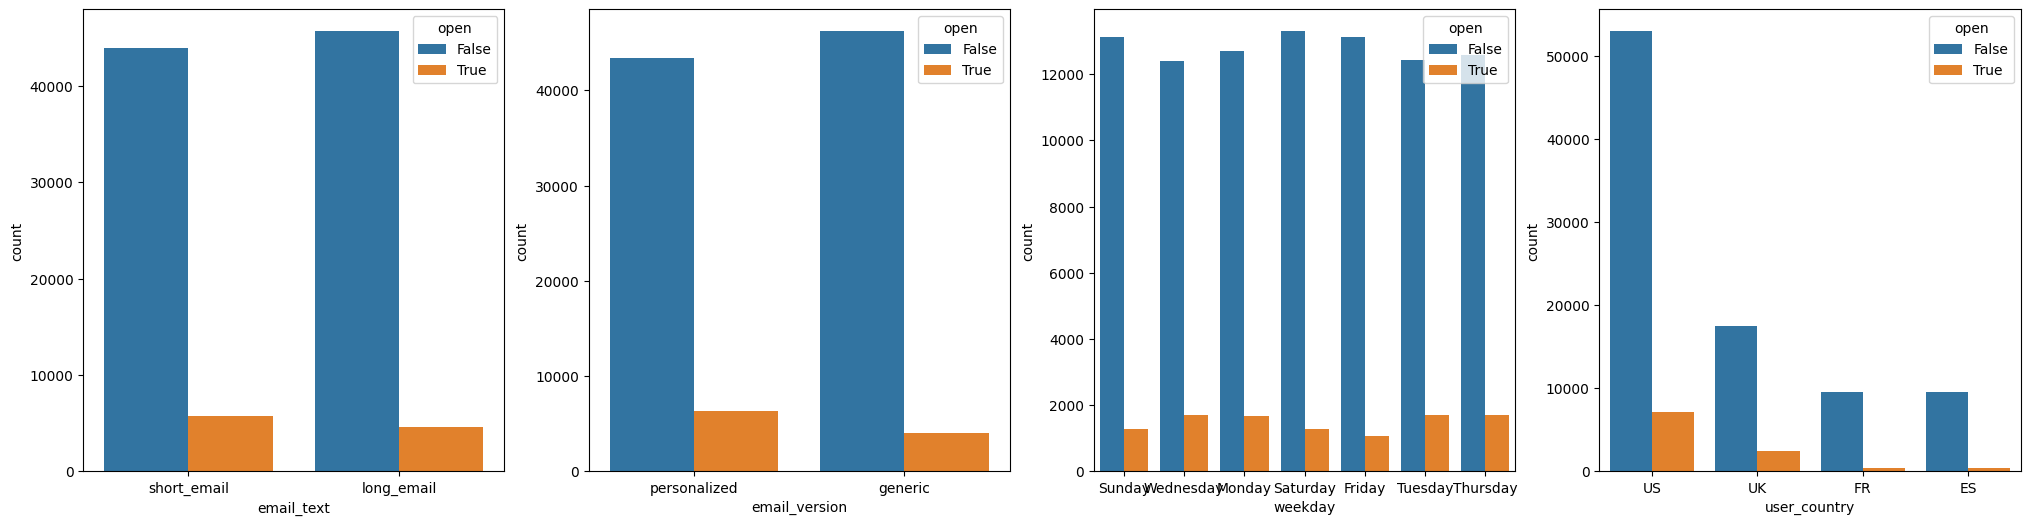

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
sns.countplot(x='email_text', hue='open', data=data, ax=ax[0])
sns.countplot(x='email_version', hue='open', data=data, ax=ax[1])
sns.countplot(x='weekday', hue='open', data=data, ax=ax[2])
sns.countplot(x='user_country', hue='open', data=data, ax=ax[3])

In [53]:
data_etext = data.group_by('email_text').agg(pl.mean(['open', 'click'])).sort('email_text')
data_ever = data.group_by('email_version').agg(pl.mean(['open', 'click'])).sort('email_version')
data_weekday = data.group_by('weekday').agg(pl.mean(['open', 'click'])).sort('weekday')
data_country = data.group_by('user_country').agg(pl.mean(['open', 'click'])).sort('user_country')


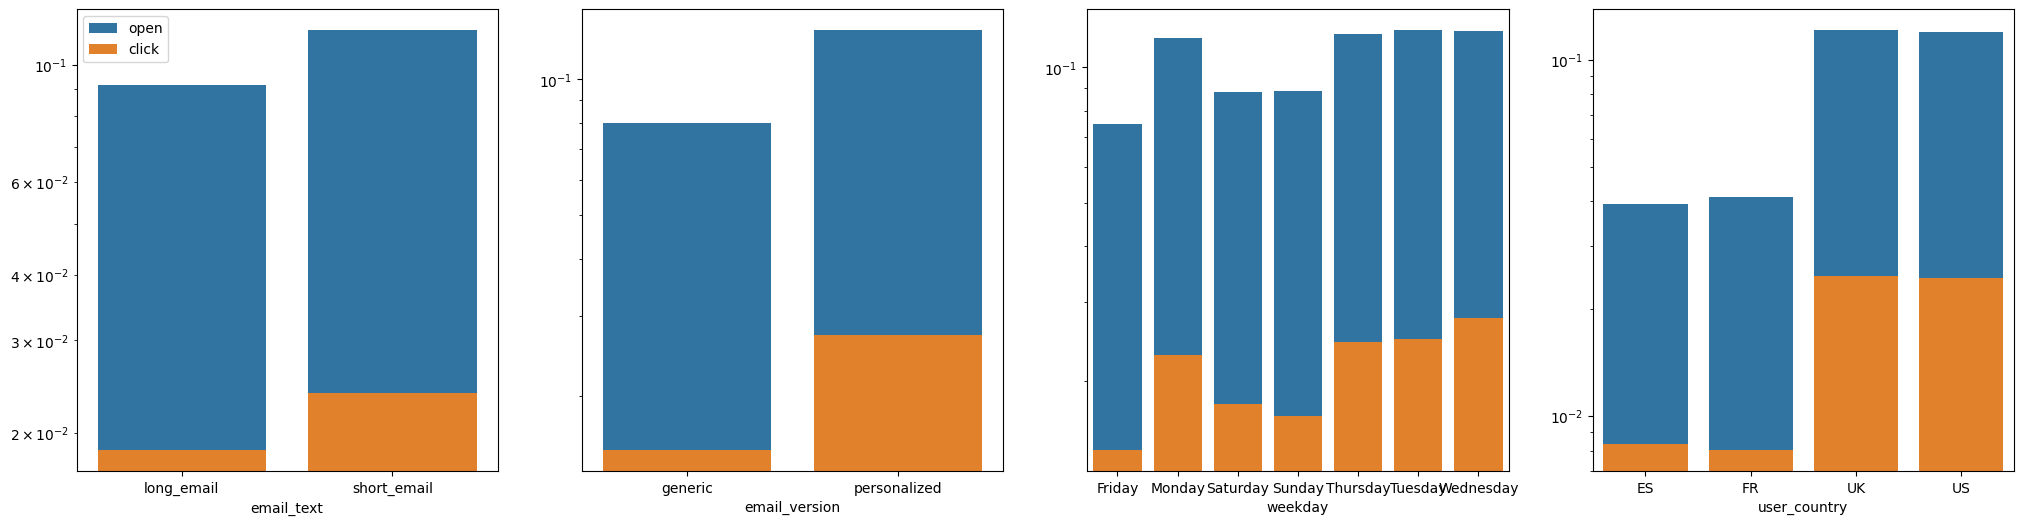

In [56]:
# user seaborn to plot
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
sns.barplot(x=data_etext['email_text'], y='open', data=data_etext, ax=ax[0], label='open')
sns.barplot(x=data_etext['email_text'], y='click', data=data_etext, ax=ax[0], label='click')
sns.barplot(x=data_ever['email_version'], y='open', data=data_ever, ax=ax[1])
sns.barplot(x=data_ever['email_version'], y='click', data=data_ever, ax=ax[1])
sns.barplot(x=data_weekday['weekday'], y='open', data=data_weekday, ax=ax[2])
sns.barplot(x=data_weekday['weekday'], y='click', data=data_weekday, ax=ax[2])
sns.barplot(x=data_country['user_country'], y='open', data=data_country, ax=ax[3])
sns.barplot(x=data_country['user_country'], y='click', data=data_country, ax=ax[3])
plt.setp(ax, yscale='log');
plt.setp(ax, ylabel=None);
ax[0].legend()

In [95]:
data_cor = data.clone()
data_cor = data_cor.drop(['email_id', 'user_country'])

In [96]:
data_cor = data_cor.with_columns(
    (pl.col('email_text') == 'long_email'),
    (pl.col('email_version') == 'personalized'),
)

In [97]:
data_cor.head()

email_text,email_version,hour,weekday,user_past_purchases,open,click
bool,bool,i64,str,i64,bool,bool
false,true,2,"""Sunday""",5,false,false
true,true,12,"""Sunday""",2,true,true
true,true,11,"""Wednesday""",2,false,false
false,false,6,"""Monday""",1,false,false
true,false,14,"""Monday""",6,false,false


In [98]:
data_cor.filter(pl.col('weekday') == 'Sunday')

email_text,email_version,hour,weekday,user_past_purchases,open,click
bool,bool,i64,str,i64,bool,bool
false,true,2,"""Sunday""",5,false,false
true,true,12,"""Sunday""",2,true,true
true,true,6,"""Sunday""",3,false,false
true,true,4,"""Sunday""",1,false,false
false,false,8,"""Sunday""",0,false,false
…,…,…,…,…,…,…
true,true,7,"""Sunday""",7,false,false
false,true,1,"""Sunday""",2,false,false
true,false,11,"""Sunday""",2,false,false


In [99]:
data_cor = data_cor.with_columns(
  pl.when(pl.col('weekday') == 'Monday').then(1)
    .when(pl.col('weekday') == 'Tuesday').then(2)
    .when(pl.col('weekday') == 'Wednesday').then(3)
    .when(pl.col('weekday') == 'Thursday').then(4)
    .when(pl.col('weekday') == 'Friday').then(5)
    .when(pl.col('weekday') == 'Saturday').then(6)
    .when(pl.col('weekday') == 'Sunday').then(7)
    .otherwise(0).alias('weekday')
)

In [100]:
data_cor.head()

email_text,email_version,hour,weekday,user_past_purchases,open,click
bool,bool,i64,i32,i64,bool,bool
false,true,2,7,5,false,false
true,true,12,7,2,true,true
true,true,11,3,2,false,false
false,false,6,1,1,false,false
true,false,14,1,6,false,false


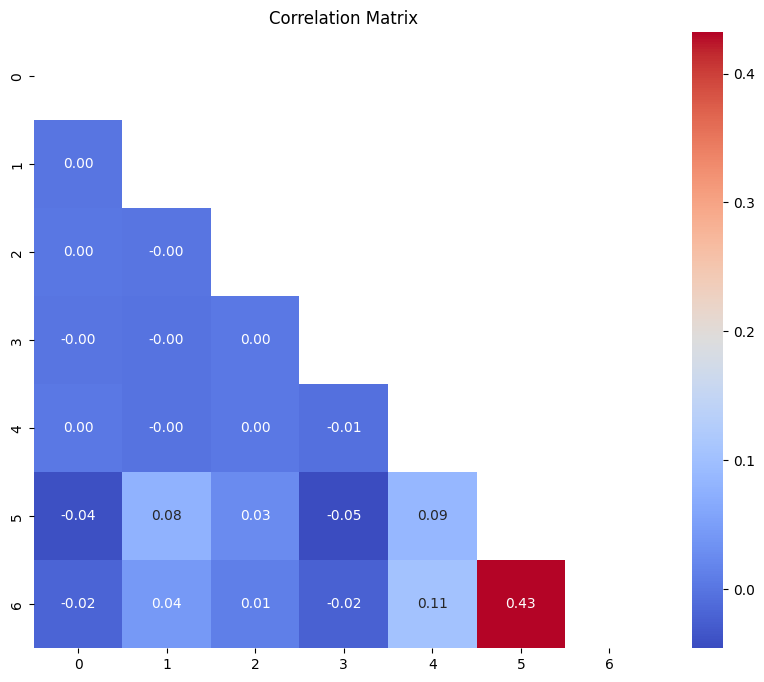

In [101]:
corr = data_cor.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()